# Cars 4 You

### Import the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

# filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

### Import the dataset

In [2]:
train_data = pd.read_csv('data/train.csv', sep = ",")
test_data = pd.read_csv('data/test.csv', sep = ",")

## Metadata

`carID` : An attribute that contains an identifier for each car <br>
`Brand` : The car's main brand (e.g. Ford, Toyota) <br>
`model` : The car model <br>
`year`: The year of Registration of the Car <br>
`mileage` : The total reported distance travelled by the car (in miles) <br>
`tax` : The amount of road tax (in £) that, in 2020, was applicable to the car in question <br>
`fuelType`: Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric) <br>
`mpg`: Average Miles per Gallon <br>
`engineSize`: Size of Engine in liters (Cubic Decimeters) <br>
`paintQuality%`: The mechanic's assessment of the cars' overall paint quality and hull integrity (filled by the mechanic during evaluation) <br>
`previousOwners`: Number of previous registered owners of the vehicle. <br>
`hasDamage`: Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not <br>
`price`: The car's price when purchased by Cars 4 You (in £) <br>

### Explore the data

In [3]:
train_data.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [4]:
train_data.tail()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75968,37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
75972,15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [5]:
# Rename columns for easier access
train_data.rename(columns={'carID': 'car_id',
                           'Brand': 'brand',
                           'fuelType': 'fuel_type',
                           'engineSize': 'engine_size',
                           'paintQuality%': 'paint_quality',
                           'previousOwners': 'previous_owners',
                           'hasDamage': 'has_damage'}, inplace=True)

train_data.columns

Index(['car_id', 'brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuel_type', 'tax', 'mpg', 'engine_size', 'paint_quality',
       'previous_owners', 'has_damage'],
      dtype='object')

In [6]:
# Define the variable carID as the new index
train_data.set_index('car_id', inplace = True)

In [7]:
# Check the number of columns and rows of the data
train_data.shape

(75973, 13)

In [8]:
# Check the data types of each column
train_data.dtypes

brand               object
model               object
year               float64
price                int64
transmission        object
mileage            float64
fuel_type           object
tax                float64
mpg                float64
engine_size        float64
paint_quality      float64
previous_owners    float64
has_damage         float64
dtype: object

- Variable such as year and previousOwners should be int instead of float.
- The variable hasDamage should be a boolean instead of float.

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            74452 non-null  object 
 1   model            74456 non-null  object 
 2   year             74482 non-null  float64
 3   price            75973 non-null  int64  
 4   transmission     74451 non-null  object 
 5   mileage          74510 non-null  float64
 6   fuel_type        74462 non-null  object 
 7   tax              68069 non-null  float64
 8   mpg              68047 non-null  float64
 9   engine_size      74457 non-null  float64
 10  paint_quality    74449 non-null  float64
 11  previous_owners  74423 non-null  float64
 12  has_damage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


In [10]:
# Check for any missing values
train_data.isna().sum()

brand              1521
model              1517
year               1491
price                 0
transmission       1522
mileage            1463
fuel_type          1511
tax                7904
mpg                7926
engine_size        1516
paint_quality      1524
previous_owners    1550
has_damage         1548
dtype: int64

- The only column having no nulls seems to be price. Every other variable needs to be checked.

In [11]:
# Check the data types of the variables
train_data.dtypes

brand               object
model               object
year               float64
price                int64
transmission        object
mileage            float64
fuel_type           object
tax                float64
mpg                float64
engine_size        float64
paint_quality      float64
previous_owners    float64
has_damage         float64
dtype: object

In [12]:
# Calculate the basic descriptive statistics of the data
train_data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,74452,72,Ford,14808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,74456,735,Focus,6353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,74482.0,NaN,NaN,NaN,2017.096611,2.208704,1970.0,2016.0,2017.0,2019.0,2024.121759
price,75973.0,NaN,NaN,NaN,16881.889553,9736.926322,450.0,10200.0,14699.0,20950.0,159999.0
transmission,74451,40,Manual,38050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,74510.0,NaN,NaN,NaN,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.0
fuel_type,74462,34,Petrol,37995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,68069.0,NaN,NaN,NaN,120.329078,65.521176,-91.12163,125.0,145.0,145.0,580.0
mpg,68047.0,NaN,NaN,NaN,55.152666,16.497837,-43.421768,46.3,54.3,62.8,470.8
engine_size,74457.0,NaN,NaN,NaN,1.660136,0.573462,-0.103493,1.2,1.6,2.0,6.6


- All of our metric variables present significant disparities between maximum value and mean, such as:
    - price - max value of circa 160K VS mean of 16K
    - mileage - max value of 323K VS mean of 23K
    - tax - max value of 580 VS mean of 120
    - mpg - max value of 470 VS mean of 55
    - engineSize - max value of 6 VS mean of 1.7
    - paintQuality% - max value of 125 VS mean of 64
    - previousOwners - max value of 6 VS 1.9

We need to look out for potential outliers: perhaps top of the range cars.

In [13]:
# Check for any duplicated observations
train_data.duplicated().sum()

4

In [14]:
# Display duplicated observations if any
train_data[train_data.duplicated(keep=False)].sort_values(by=['brand', 'model', 'year', 'price'])

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,,
23477,Ford,Focus,2017.0,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4.0,0.0
25766,Ford,Focus,2017.0,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4.0,0.0
15152,Ford,Focus,2018.0,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4.0,0.0
21404,Ford,Focus,2018.0,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4.0,0.0
33774,Hyundai,I10,2017.0,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4.0,0.0
34128,Hyundai,I10,2017.0,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4.0,0.0
33890,Hyundai,Ioniq,2019.0,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3.0,0.0
34301,Hyundai,Ioniq,2019.0,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3.0,0.0


In [15]:
# Remove duplicated observations
train_data.drop_duplicates(inplace=True)

In [16]:
# Get the unique values for each column of the data
cols = train_data.columns
for name in cols:
    print(f"{name}: \n{train_data[name].unique()}")

brand: 
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
model: 
[' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 ' i20' ' Rapid' ' a1' ' Auris

Most of our variables are having inconsistent data:
- Brand for example is having multiple values for the same brand, such as BMW (BMW, BM, MW): we need to clean this variable.
- Model, similarly to brand is having too many unique values. We might need to group these values and classify them. 
- The same applies for Transmission and Fuel Type
- Previous Owners and Year need to be int/string with absolute values
- Does it make sense for tax to have negative values?


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
##### Possible Brands in our dataset:
- Volskwagen
- BMW
- Toyota
- Audi
- Ford
- Skoda
- Opel
- Mercedes
- Hyundai

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
# Function to standardize car brand names
def replace_brand(brand):
    """Replaces various representations of car brands with standardized names."""

    if pd.isna(brand):                                                                          # In case of missing value keep as NaN
        return np.nan
    else:                                                                                       # Else standardize brand names     
        brand = brand.lower()                                                                   # Convert to lowercase for easier matching     
                                                                                                                                                                
        if 'volkswagen'.__contains__(brand) or 'vw'.__contains__(brand):
            brand = 'Volkswagen'
        elif 'bmw'.__contains__(brand):
            brand = 'BMW'
        elif 'toyota'.__contains__(brand):
            brand = 'Toyota'
        elif 'audi'.__contains__(brand):
            brand = 'Audi'
        elif 'ford'.__contains__(brand):
            brand = 'Ford'
        elif 'skoda'.__contains__(brand):
            brand = 'Skoda'
        elif 'opel'.__contains__(brand):
            brand = 'Opel'
        elif 'mercedes'.__contains__(brand) or 'mercedez'.__contains__(brand):
            brand = 'Mercedes'
        elif 'hyundai'.__contains__(brand):
            brand = 'Hyundai'
        else:
            brand = 'Unknown'
   
    return brand

In [18]:
# Test the function before applying it to the dataset (THIS CELL IS TO BE REMOVED AFTER TESTING TO AVOID REDUNDANCY)
brands = train_data['brand'].unique()
for brand in brands:
    print(f"{brand} => {replace_brand(brand)}")

VW => Volkswagen
Toyota => Toyota
Audi => Audi
Ford => Ford
BMW => BMW
Skoda => Skoda
Opel => Opel
Mercedes => Mercedes
FOR => Ford
mercedes => Mercedes
Hyundai => Hyundai
w => Volkswagen
ord => Ford
MW => BMW
bmw => BMW
nan => nan
yundai => Hyundai
BM => BMW
Toyot => Toyota
udi => Audi
Ope => Opel
AUDI => Audi
V => Volkswagen
opel => Opel
pel => Opel
For => Ford
pe => Opel
Mercede => Mercedes
audi => Audi
MERCEDES => Mercedes
OPEL => Opel
koda => Skoda
FORD => Ford
Hyunda => Hyundai
W => Volkswagen
Aud => Audi
vw => Volkswagen
hyundai => Hyundai
skoda => Skoda
ford => Ford
TOYOTA => Toyota
ercedes => Mercedes
oyota => Toyota
toyota => Toyota
SKODA => Skoda
Skod => Skoda
HYUNDAI => Hyundai
kod => Skoda
v => Volkswagen
for => Ford
SKOD => Skoda
aud => Audi
KODA => Skoda
PEL => Opel
yunda => Hyundai
or => Ford
UDI => Audi
OYOTA => Toyota
HYUNDA => Hyundai
mw => BMW
OPE => Opel
mercede => Mercedes
ERCEDES => Mercedes
ercede => Mercedes
TOYOT => Toyota
MERCEDE => Mercedes
ORD => Ford
ud =>

In [19]:
# Apply the function to standardize brand names in the 'brand' column
train_data['brand'] = train_data['brand'].apply(replace_brand)
train_data['brand'].unique()

array(['Volkswagen', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel',
       'Mercedes', 'Hyundai', nan], dtype=object)

##### Possible Models in our dataset:

- Volkswagen
    - Golf: 'golf' 
    - Golf S: 'golf s'
    - Polo: 'polo' 'pol'
    - Passat: 'passat' 'passa'
    - Up: 'up' 'u'
    - T-Roc: 't-roc' 't-ro'
    - T-Crossland: 't-cross' 't-cros'
    - Sharan: 'sharan' 'shara'
    - Tiguan: 'tiguan' 'tigua'
    - Touareg: 'touareg' 'touare'
    - Tiguan Allspace: 'tiguan allspace' 'tiguan allspac'
    - Arteon: 'arteon' 'arteo'
    - Amarok: 'amarok' 'amaro'
    - Touran: 'touran' 'toura'
    - Caddy: 'caddy'
    - Caddy Life: 'caddy life'
    - Caddy Maxi: 'caddy maxi'
    - Caddy Maxi Life: 'caddy maxi life' 'caddy maxi lif'
    - Beetle: 'beetle' 'beetl'
    - Shuttle: 'shuttle'
    - Caravelle: 'caravelle' 'caravell'
    - California: 'california'
    - Scirocco: 'scirocco' 'scirocc'
    - CC: 'cc'
    - Eos: 'eos'
    - Fox: 'fox'
    - Jetta: 'jetta'
 
 --------------------------------------------------------------------------

- BMW
    - 1 Series: '1 series' '1 serie'
    - 2 Series: '2 series' '2 serie'
    - 3 Series: '3 series', '3 serie'
    - 4 Series: '4 series' '4 serie'
    - 5 Series: '5 series' '5 serie'
    - 6 Series: '6 series' '6 serie'
    - 7 Series: '7 series' '7 serie'
    - 8 Series: '8 series' '8 serie'
    - I: 'i'
    - I1: 'i1'
    - I2: 'i2'
    - I3: 'i3'
    - I8: 'i8'
    - IX2: 'ix2'
    - M: 'm'
    - M3: 'm3'
    - M2: 'm2'
    - M4: 'm4'
    - M5: 'm5'
    - M6: 'm6'
    - X: 'x'
    - X1: 'x1'
    - X2: 'x2'
    - X3: 'x3'
    - X4: 'x4'
    - X5: 'x5'
    - X6: 'x6'
    - X7: 'x7'
    - Z: 'z'
    - Z3:'z3'
    - Z4: 'z4'
 
 ---------------------------------------------------------------------------------------

 - Toyota 
   -  Yaris: 'yaris' 'yari'
   - Auris: 'auris' 'auri'
   - C-HR: 'c-hr' 'c-h'
   - AYGO: 'aygo'
   - RAV4: 'rav4' 'rav'
   - Prius: 'prius'
   - Corolla: 'corolla' 'coroll'
   - Verso: 'verso' 'vers'
   - Verso-S: 'verso-s'
   - Proace Verso: 'proace verso'
   - GT86: 'gt86'
   - IQ: 'iq'
   - Land Cruiser: 'land cruiser' 'land cruise'
   - Urban Cruiser: 'urban cruiser' 'urban cruise'
   - Hilux: 'hilux' 'hilu'
   - Avensis: 'avensis'
   - Camry: 'camry
   - Supra: 'supra'
 
 --------------------------------------------------------------------------

 - Audi
   - A1: 'a1'
   - A2: 'a2'
   - A3: 'a3'
   - A4: 'a4'
   - A5: 'a5'
   - A6: 'a6'
   - A7: 'a7'
   - A8: 'a8'
   - Q2: 'q2'
   - Q3: 'q3'
   - Q5: 'q5'
   - Q7: 'q7'
   - Q8: 'q8'
   - S1: 'sl'
   - S3: 's3'
   - S5: 's5'
   - TT: 'tt' 't'
   - R8: 'r8'
   - RS: 'rs'
   - RS3: 'rs3'
   - RS4: 'rs4'
   - RS5: 'rs5'
   - RS6: 'rs6'
   - SQ5: 'sq5'
   - SQ7: 'sq7'
   - S4: 's4'
   - S8: 's8'
 
 ------------------------------------------------------------------------------

- Ford
   - Fiesta: 'fiesta'
   - Focus: 'focus' 'focu'
   - Fusion: 'fusion'
   - K: 'k'
   - Ka: 'ka'
   - Ka+: 'ka+'
   - EcoSport: 'ecosport' 'ecospor'
   - Escort: 'escort'
   - B-Max: 'b-max' 'b-ma'
   - C-Max: 'c-max' 'c-ma'
   - Grand C-Max: 'grand c-max' 'grand c-ma'
   - S-Max: 's-max' 's-ma'
   - Mondeo: 'mondeo' 'monde'
   - Mustang: 'mustang'
   - Kuga: 'kuga' 'kug'
   - Tourneo Connect: 'tourneo connect'
   - Grand Tourneo Connect: 'grand tourneo connect' 'grand tourneo connec'
   - Tourneo Custom: 'tourneo custom' 'tourneo custo'
   - Galaxy: 'galaxy' 'galax'
   - Puma: 'puma'
   - Edge: 'edge' 'edg'
   - Streetka: 'streetka'
   - Ranger: 'ranger'

 --------------------------------------------------------------------------------------------------

- Skoda
   - Octavia: 'octavia' 'octavi'
   - Fabia: 'fabia' 'fabi'
   - Rapid: 'rapid' 'rapi'
   - Yeti: 'yeti' 'yet'
   - Yeti Outdoor: 'yeti outdoor' 'yeti outdoo'
   - Scala: 'scala' 'scal'
   - Kamiq: 'kamiq' 'kami'
   - Kodiaq: 'kodiaq' 'kodia'
   - Citigo: 'citigo' 'citig'
   - Roomster: 'roomster' 'roomste'
   - Superb: 'superb' 'super'
   - Karoq: 'karoq' 'karo'
 
 ---------------------------------------------------------------------------------

 - Opel
   - Insignia: 'insignia' 'insigni'
   - Mokka: 'mokka' 'mokk'
   - Mokka X: 'mokka x'
   - Corsa: 'corsa' 'cors'
   - Cascada: 'cascada'
   - Astra: 'astra' 'astr'
   - Vectra: 'vectra'
   - Viva: 'viva' 'viv'
   - Vivaro: 'vivaro'
   - Ampera: 'ampera'
   - Adam: 'adam' 'ada'
   - Antara: 'antara'
   - Meriva: 'meriva' 'meriv'
   - Crossland: 'crossland'
   - Crossland X: 'crossland x'
   - Zafira: 'zafira' 'zafir'
   - Zafira Tourer: 'zafira tourer' 'zafira toure'
   - Grandland: 'grandland'
   - Grandland X: 'grandland x'
   - Combo Life: 'combo life' 'combo lif'
   - GTC: 'gtc'
   - Kadjar: 'kadjar'
   - Tigra: 'tigra'
 
 -----------------------------------------------------------------------------------------

 - Mercedes
   - A-Class: 'a clas' 'a class'
   - B-Class: 'b class' 'b clas'
   - C-Class: 'c class' 'c clas'
   - E-Class: 'e class' 'e clas'
   - G-Class: 'g class'
   - M-Class: 'm class' 'm clas'
   - S-Class: 's class'
   - V-Class: 'v class' 'v clas'
   - X-Class: 'x-class' 'x-clas'
   - CL-Class: 'cl class' 'cl clas'
   - GL-Class:'gl class'
   - SL-Class: 'sl class' 'sl clas' 'sl'
   - CLA-Class: 'cla class'
   - CLC-Class: 'clc class'
   - CLS-Class: 'cls class' 'cls clas'
   - CLK-Class: 'clk'
   - GLA: 'gla class' 'gla clas'
   - GLB: 'glb class'
   - GLC: 'glc class' 'glc clas'
   - GLS: 'gls class' 'gls clas'
   - GLE: 'gle class' 'gle clas'
   - SLK: 'slk'
   - 200: '200'
   - 220: '220'
   - 230: '230'

 ---------------------------------------------------------------------------------------

 - Hyundai
   - i40: 'i40'
   - i30: 'i30'
   - i20: 'i20'
   - i10: 'i10'
   - ix20: 'ix20'
   - ix35: 'ix35'
   - Accent: 'accent'
   - Tucson: 'tucson' 'tucso'
   - Terracan: 'terracan'
   - Kona: 'kona' 'kon'
   - Ioniq: 'ioniq' 'ioni'
   - Santa Fe: 'santa fe' 'santa f'
   - i800: 'i800' 'i80'
   - Getz: 'getz'
   - Veloster: 'veloste

---------------------------------------------------------------------------------------------------------------------------------------

In [20]:
# Function to standardize car model names
def replace_model(model):
    """Replaces various representations of car models with standardized names."""

    if pd.isna(model):                                                                          # In case of missing value keep as NaN
        return np.nan
    else:                                                                                       # Else standardize model names
        model = model.lower().strip()                                                           # Convert to lowercase for easier matching and remove leading/trailing spaces
        
        if model in ['coroll', 'kug', 'octavi', 'fabi', 'scal', 'insigni', 'mokk', 'cors', 'astr', 'viv', 'meriv', 'zafir', 'kon']:
            model = model + 'a'
        elif model in ['super']:
            model = model + 'b'
        elif model in ['t-ro']:
            model = model + 'c'
        elif model in ['sl', 'clk', 'slk']:
            model = model + ' class'
        elif model in ['rapi']:
            model = model + 'd'     
        elif model in ['tiguan allspac', 'beetl', 'caravell', 'edg', 'combo lif', 'santa f']:
            model = model + 'e'
        elif model in ['gol']:
            model = model + 'f'
        elif model in ['touare' ]:
            model = model + 'g'
        elif model in ['yet']:
            model = model + 'i'
        elif model in ['amaro']:        
            model = model + 'k' 
        elif model in ['tourneo custo', 'ada']:
            model = model + 'm'
        elif model in ['shara', 'tigua', 'arteo', 'toura', 'tucso']:
            model = model + 'n'
        elif model in ['pol', 'scirocc', 'vers', 'monde', 'citig']:
            model = model + 'o'
        elif model in ['u']:
            model = model + 'p'
        elif model in ['kami', 'kodia', 'karo', 'ioni']:
            model = model + 'q'
        elif model in ['c-h', 'land cruise', 'urban cruise', 'yeti outdoo', 'roomste', 'zafira toure', 'veloste']:
            model = model + 'r'
        elif model in ['t-cros', 'focu'] or model[-5:] == ' clas' or model[-5:] == 'serie':
            model = model + 's'
        elif model in ['passa', 't', 'ecospor', 'grand tourneo connec']:
            model = model + 't'
        elif model in ['hilu'] or model[-3:] == '-ma':
            model = model + 'x'
        elif model in ['galax']:
            model = model + 'y'
        elif model in ['rav']:
            model = model + '4'
        elif model in ['i80']:
            model = model + '0'
            
    return model

In [21]:
# Test the function before applying it to the dataset (THIS CELL IS TO BE REMOVED AFTER TESTING TO AVOID REDUNDANCY)
models = train_data['model'].unique()
for model in models:
    print(f"{model} => {replace_model(model)}")

 Golf => golf
 Yaris => yaris
 Q2 => q2
 FIESTA => fiesta
 2 Series => 2 series
3 Series => 3 series
 A3 => a3
 Octavia => octavia
 Passat => passat
 Focus => focus
 Insignia => insignia
 A Clas => a class
 Q3 => q3
 Fabia => fabia
 A Class => a class
 Ka+ => ka+
 3 Series => 3 series
 GLC Class => glc class
 I30 => i30
 C Class => c class
 Polo => polo
 E Class => e class
 C Clas => c class
 Q5 => q5
 Up => up
 Fiesta => fiesta
 C-HR => c-hr
 Mokka X => mokka x
 Corsa => corsa
 Astra => astra
 TT => tt
 5 Series => 5 series
 Aygo => aygo
 4 Series => 4 series
 SLK => slk class
 Viva => viva
 T-Roc => t-roc
Focus => focus
 EcoSport => ecosport
 Tucson => tucson
 EcoSpor => ecosport
nan => nan
 X-CLASS => x-class
 CL Class => cl class
 IX20 => ix20
 i20 => i20
 Rapid => rapid
 a1 => a1
 Auris => auris
 sharan => sharan
 I20 => i20
 Adam => adam
 X3 => x3
 A8 => a8
 GLS Class => gls class
 B-MAX => b-max
 A4 => a4
 Kona => kona
 I10 => i10
 A1 => a1
 Mokka => mokka
 fiesta => fiesta
 S-M

In [22]:
# Apply the function to standardize model names in the 'model' column
train_data['model'] = train_data['model'].apply(replace_model)
train_data['model'].unique()

array(['golf', 'yaris', 'q2', 'fiesta', '2 series', '3 series', 'a3',
       'octavia', 'passat', 'focus', 'insignia', 'a class', 'q3', 'fabia',
       'ka+', 'glc class', 'i30', 'c class', 'polo', 'e class', 'q5',
       'up', 'c-hr', 'mokka x', 'corsa', 'astra', 'tt', '5 series',
       'aygo', '4 series', 'slk class', 'viva', 't-roc', 'ecosport',
       'tucson', nan, 'x-class', 'cl class', 'ix20', 'i20', 'rapid', 'a1',
       'auris', 'sharan', 'adam', 'x3', 'a8', 'gls class', 'b-max', 'a4',
       'kona', 'i10', 'mokka', 's-max', 'x2', 'crossland x', 'tiguan',
       'a5', 'gle class', 'zafira', 'ioniq', 'a6', 'mondeo',
       'yeti outdoor', 'x1', 'scala', 's class', '1 series', 'kamiq',
       'kuga', 'tourneo connect', 'q7', 'gla class', 'arteon', 'sl class',
       'santa fe', 'grandland x', 'i800', 'rav4', 'touran', 'citigo',
       'roomster', 'prius', 'corolla', 'fiest', 'b class', 'q', 'kodiaq',
       'v class', 'caddy maxi life', 'superb', 'getz', 'combo life',
       'b

##### Possible Types of Transmission in our dataset

- Manual
- Automatic
- Semi-Automatic

In [23]:
# Function to standardize transmission types
def replace_transmission(transmission):
    """Replaces various representations of transmission types with standardized names."""

    if pd.isna(transmission):                                                                          # In case of missing value keep as NaN
        return np.nan
    else:                                                                                              # Else standardize transmission names     
        transmission = transmission.lower().strip()                                                    # Convert to lowercase for easier matching and remove leading/trailing spaces    
                                                                                                                                                                
        if 'manual'.__contains__(transmission):
            transmission = 'Manual'
        elif 'automatic'.__contains__(transmission):
            transmission = 'Automatic'
        elif 'semi-automatic'.__contains__(transmission) or 'semiautomatic'.__contains__(transmission):
            transmission = 'Semi-Automatic'
        else:
            transmission = np.nan
   
    return transmission

In [24]:
# Test the function before applying it to the dataset (THIS CELL IS TO BE REMOVED AFTER TESTING TO AVOID REDUNDANCY)
transmissions = train_data['transmission'].unique()
for transmission in transmissions:
    print(f"{transmission} => {replace_transmission(transmission)}")

Semi-Auto => Semi-Automatic
Manual => Manual
anual => Manual
Semi-Aut => Semi-Automatic
Automatic => Automatic
manual => Manual
nan => nan
unknown => nan
Manua => Manual
AUTOMATIC => Automatic
MANUAL => Manual
semi-auto => Semi-Automatic
 Manual  => Manual
automatic => Automatic
emi-Auto => Semi-Automatic
SEMI-AUTO => Semi-Automatic
SEMI-AUT => Semi-Automatic
Automati => Automatic
ANUAL => Manual
utomatic => Automatic
unknow => nan
EMI-AUTO => Semi-Automatic
manua => Manual
anua => Manual
emi-Aut => Semi-Automatic
MANUA => Manual
emi-auto => Semi-Automatic
UTOMATIC => Automatic
 manual  => Manual
 MANUAL  => Manual
UNKNOWN => nan
nknown => nan
automati => Automatic
Other => nan
semi-aut => Semi-Automatic
 Manual => Manual
AUTOMATI => Automatic
utomati => Automatic
Manual  => Manual
manual  => Manual
nknow => nan


In [25]:
# Apply the function to standardize transmission type in the 'transmission' column
train_data['transmission'] = train_data['transmission'].apply(replace_transmission)
train_data['transmission'].unique()

array(['Semi-Automatic', 'Manual', 'Automatic', nan], dtype=object)

##### Possible Types of Fuel

- Petrol
- Diesel
-  Hybrid
- Electric

In [26]:
# Function to standardize fuel types
def replace_fuel(fuel):
    """Replaces various representations of fuel types with standardized names."""

    if pd.isna(fuel):                                                                         # In case of missing value keep as NaN
        return np.nan
    else:                                                                                     # Else standardize fuel names     
        fuel = fuel.lower().strip()                                                           # Convert to lowercase for easier matching and remove leading/trailing spaces
        
        if 'petrol'.__contains__(fuel):
            fuel = 'Petrol'
        elif 'diesel'.__contains__(fuel):
            fuel = 'Diesel'
        elif 'hybrid'.__contains__(fuel):
            fuel = 'Hybrid'
        elif 'electric'.__contains__(fuel):
            fuel = 'Electric'   
        else:
            fuel = np.nan
   
    return fuel 

In [27]:
# Test the function before applying it to the dataset (THIS CELL IS TO BE REMOVED AFTER TESTING TO AVOID REDUNDANCY)
fuel_types = train_data['fuel_type'].unique()
for fuel in fuel_types:
    print(f"{fuel} => {replace_fuel(fuel)}")

Petrol => Petrol
Diesel => Diesel
etrol => Petrol
Hybrid => Hybrid
diesel => Diesel
iesel => Diesel
nan => nan
petrol => Petrol
PETROL => Petrol
Diese => Diesel
Petro => Petrol
DIESEL => Diesel
petro => Petrol
HYBRID => Hybrid
ybri => Hybrid
Other => nan
DIESE => Diesel
Hybri => Hybrid
ETROL => Petrol
ybrid => Hybrid
PETRO => Petrol
hybrid => Hybrid
IESEL => Diesel
Electric => Electric
ther => nan
iese => Diesel
etro => Petrol
ETRO => Petrol
diese => Diesel
Othe => nan
YBRID => Hybrid
HYBRI => Hybrid
OTHER => nan
other => nan
IESE => Diesel


In [28]:
# Apply the function to standardize fuel type in the 'fuel type' column
train_data['fuel_type'] = train_data['fuel_type'].apply(replace_fuel)
train_data['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid', nan, 'Electric'], dtype=object)

Let's convert column 'year', 'previous_owners' into more appropriate data types

In [29]:
# Convert column 'year' into string
train_data['year'] = train_data['year'].fillna(0).astype(int).astype(str).replace('0', np.nan)

HELP!

In [30]:
# Convert column 'previous_owners' into int and replace nan with 0
train_data['previous_owners'] = abs(train_data['previous_owners'])

In [31]:
train_data['previous_owners'].unique()

array([4.        , 1.        , 2.34030622, 3.        , 0.        ,
       2.        ,        nan, 2.34565   , 6.25837066, 2.33512284,
       6.22789796, 6.25823052, 6.23017958, 2.33936045, 6.21772443,
       6.24583495, 2.29943868, 2.34010209, 2.31225953, 6.2482512 ,
       2.31733109, 6.23308217, 6.24177863, 2.33744529])

- To confirm after further analysis if we should keep the missing values as 0 or replace with mean or median for example.

In [32]:
train_data.dtypes

brand               object
model               object
year                object
price                int64
transmission        object
mileage            float64
fuel_type           object
tax                float64
mpg                float64
engine_size        float64
paint_quality      float64
previous_owners    float64
has_damage         float64
dtype: object

Let's now clean some of the missing values in column brand

In [35]:
# Sort the dataframe by model and brand to easily identify similar entries
train_data.sort_values(by=['model', 'brand'], ascending=[True, True], inplace=True)
train_data

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,,
12495,BMW,1 series,2017,14495,NaN,20031.0,Petrol,30.0,58.9,1.5,81.0,4.0,0.0
7780,BMW,1 series,2015,12300,Automatic,32694.0,Diesel,20.0,72.4,1.5,73.0,1.0,0.0
8378,BMW,1 series,2019,25999,Semi-Automatic,575.0,Diesel,145.0,NaN,2.0,87.0,1.0,0.0
7979,BMW,1 series,2017,14500,Automatic,27245.0,Diesel,145.0,68.9,2.0,89.0,3.0,0.0
8676,BMW,1 series,2017,10800,Manual,60281.0,Diesel,20.0,70.6,1.5,61.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31541,NaN,NaN,2014,9691,Automatic,29064.0,Diesel,165.0,51.4,1.6,31.0,2.0,0.0
61305,NaN,NaN,2020,16999,Semi-Automatic,10.0,Petrol,145.0,44.1,1.2,82.0,2.0,0.0
13026,NaN,NaN,2014,15000,Semi-Automatic,38689.0,Petrol,235.0,37.7,3.0,96.0,3.0,0.0


In [ ]:
# Save the DataFrame to a CSV file at the specified path
#train_data.to_csv(r'C:\Users\mafal\Documents\MSc Data Science\1st Semester\Machine Learning\Project\train_data_sorted.csv', index=False)

In [36]:
# Create a mask where 'model' is not NaN
mask = train_data['model'].notna()
mask

car_id
12495     True
7780      True
8378      True
7979      True
8676      True
         ...  
31541    False
61305    False
13026    False
68226    False
4703     False
Name: model, Length: 75969, dtype: bool

In [37]:
# Fill missing brand values by forward filling from previous entries but only if model is not NaN
train_data.loc[mask, 'brand'] = train_data.loc[mask, 'brand'].ffill()

In [ ]:
# Save the DataFrame to a CSV file at the specified path
#train_data.to_csv(r'C:\Users\mafal\Documents\MSc Data Science\1st Semester\Machine Learning\Project\train_data_brand_clean.csv', index=False)

We have a lot of missing values, so let's take care of them. But, first, let's divide the columns into metric and non-metric features.

In [40]:
non_metric_features = ["brand", "model", "transmission", "fuel_type", 'year']
metric_features = train_data.columns.drop(non_metric_features).to_list()

In [41]:
# Calculate the mean for each metric feature
means = train_data[metric_features].mean()
means

price              16882.001922
mileage            23004.761128
tax                  120.328500
mpg                   55.152286
engine_size            1.660161
paint_quality         64.591773
previous_owners        2.017737
has_damage             0.000000
dtype: float64

In [42]:
# Calculate the median for each metric feature
medians = train_data[metric_features].median()
medians

price              14699.0
mileage            17301.0
tax                  145.0
mpg                   54.3
engine_size            1.6
paint_quality         65.0
previous_owners        2.0
has_damage             0.0
dtype: float64

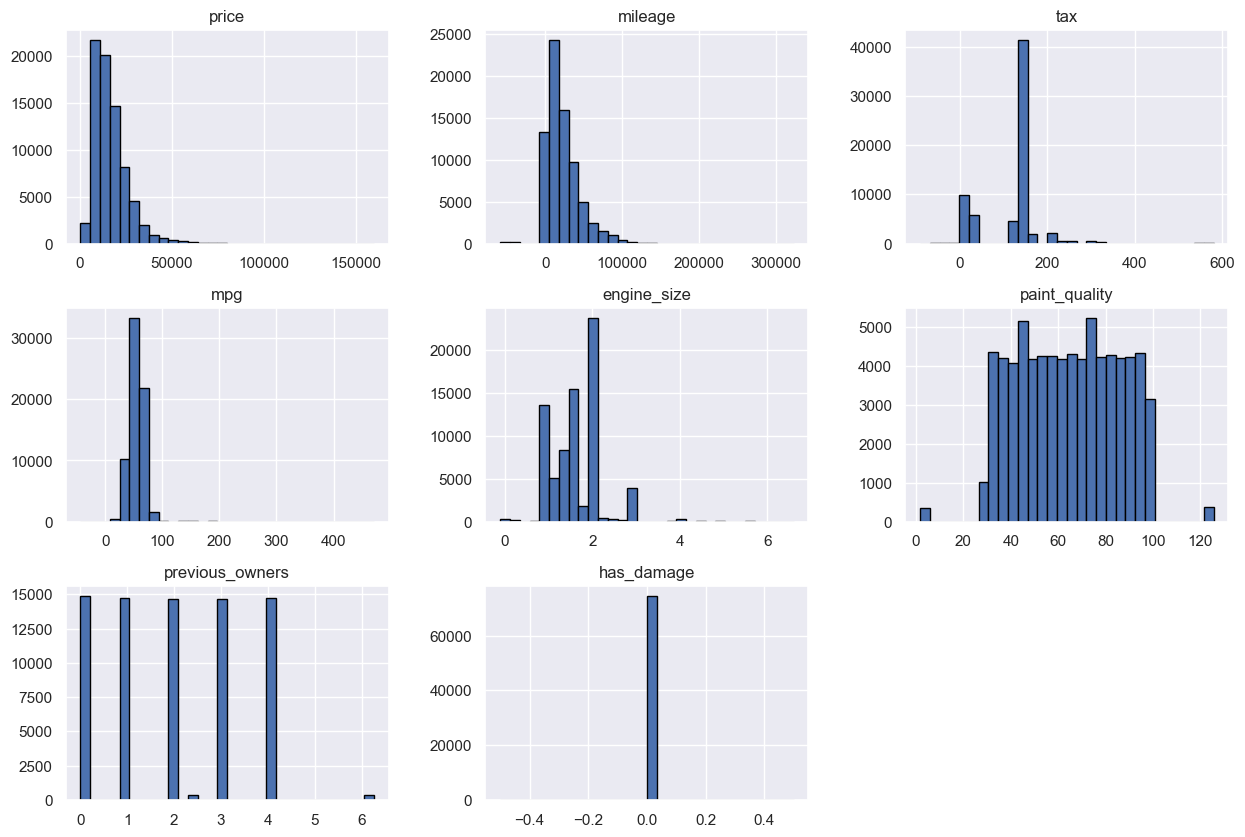

In [43]:
# Do an histogram for each metric feature to choose which method we will use to fill the missing values with
train_data[metric_features].hist(
    figsize = (15, 10),
    bins = 30,
    edgecolor = 'black',
)
plt.show()